# Predicting student population

## Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

## Load student data

In [2]:
students = pd.read_csv('Data/students.csv')
semester_split = students.Semester.str.split()
students['Term'] = [semester_split[i][0] for i in range(len(students))]
students['Year'] = [semester_split[i][1] for i in range(len(students))]

students.head()

,Semester,Total_enrollment,Male,Female,Undergrad,Postbac,Master,Doctoral,Professional,Age_Undergrad_Male,...,Pharm_Male,Pharm_Female,White,Hispanic,Asian_American,African_American,International,Others,Term,Year
0,Spring 2014,37538,18917,18621,28535,1234,4190,2039,1540,23.4,...,163,278,11478,9686,7338,3889,3724,1423,Spring,2014
1,Summer 2014,14797,7198,7599,10463,580,1803,1233,718,24.1,...,92,152,4625,3590,2915,1486,1611,570,Summer,2014
2,Fall 2014,40914,20730,20184,31722,1325,4111,2179,1577,23.1,...,166,293,11855,10994,8215,4173,4025,1652,Fall,2014
3,Spring 2015,39032,19774,19258,30080,1347,3936,2136,1533,23.3,...,166,290,11211,10530,7956,3885,3860,1590,Spring,2015
4,Summer 2015,14216,6747,7469,10915,564,1629,460,648,23.8,...,80,152,4444,3818,2989,1390,964,611,Summer,2015


In [3]:
students.Year = students.Year.astype(float)
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Semester               33 non-null     object 
 1   Total_enrollment       33 non-null     int64  
 2   Male                   33 non-null     int64  
 3   Female                 33 non-null     int64  
 4   Undergrad              33 non-null     int64  
 5   Postbac                33 non-null     int64  
 6   Master                 33 non-null     int64  
 7   Doctoral               33 non-null     int64  
 8   Professional           33 non-null     int64  
 9   Age_Undergrad_Male     33 non-null     float64
 10  Age_Undergrad_Female   33 non-null     float64
 11  Age_Postbac_Male       33 non-null     float64
 12  Age_Postbac_Female     33 non-null     float64
 13  Age_Master_Male        33 non-null     float64
 14  Age_Master_Female      33 non-null     float64
 15  Age_Doct

In [4]:
students_spring = students[students.Term == 'Spring'].copy()
students_fall = students[students.Term == 'Fall'].copy()
students_summer = students[students.Term == 'Summer'].copy()

In [5]:
l = ['Male', 'Female']
'Female' in l or 'female' in l

True

In [6]:
colors = ['r', 'g', 'b', 'c', 'm']

def student_prediction(semester: str, deg: int, col: list):
    if semester == 'Spring':
        df = students_spring
    elif semester == 'Summer':
        df = students_summer
    elif semester == 'Fall':
        df = students_fall
    else:
        print('Invalid semester')

    if 'Male' in col:
        group = 'Gender'
    elif 'White' in col:
        group = 'Race'
    else:
        group = 'Undergrad'

    prediction = {}
    plt.figure(figsize=(13, 7))
    for c in col:
        idx = col.index(c)
        p = np.poly1d(np.polyfit(df.Year, df[c], deg))
        x_new = np.linspace(2014, 2024)
        y_new = p(x_new) 
        prediction[c] = p([2025, 2026, 2027])
        plt.plot(df.Year, df[c], color = colors[idx], label = c)
        plt.plot(x_new, y_new, linestyle = '--', color = colors[idx], label = c + ' Prediction')
    plt.xlabel('Year', fontsize=15)
    plt.ylabel('Population', fontsize=15)
    plt.title('Semester: ' + semester, fontsize=20)
    plt.legend(fontsize = 15)
    n = semester + '_' + group + '_prediction' 
    filename = f"Figure/{n}.jpg"
    plt.savefig(filename, bbox_inches='tight')
    plt.show()  
    
    return prediction

## Prediction - Spring semester (2025 - 2027)

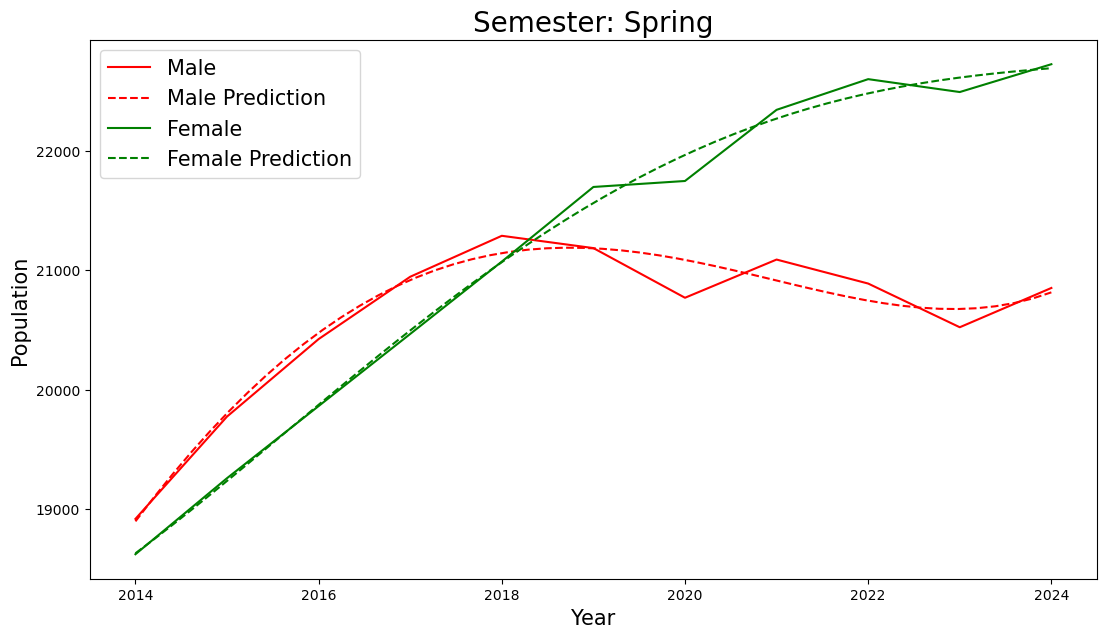

{'Male': array([21289.45117188, 22242.78515625, 23832.54101562]),
 'Female': array([22751.48925781, 22837.6484375 , 23005.62207031])}

In [7]:
# Gender
student_prediction('Spring', 4, ['Male', 'Female'])

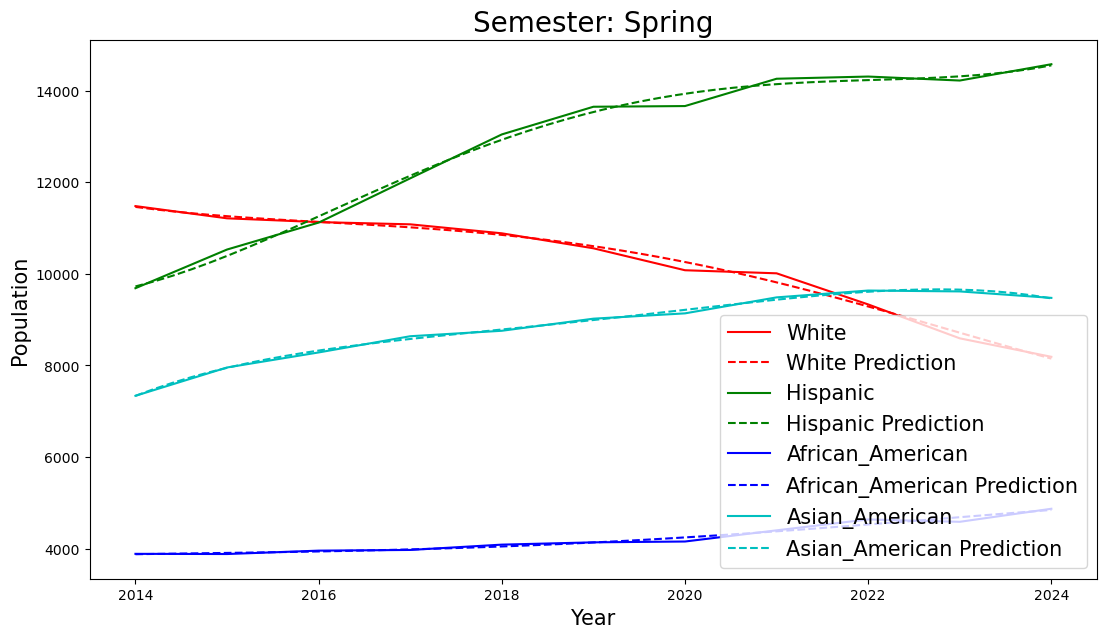

{'White': array([7660.328125  , 7336.32617188, 7282.8203125 ]),
 'Hispanic': array([15156.8359375 , 16393.43359375, 18566.328125  ]),
 'African_American': array([4990.38647461, 5103.66967773, 5167.67041016]),
 'Asian_American': array([8893.12109375, 7770.1328125 , 5890.25      ])}

In [8]:
# Race
student_prediction('Spring', 4, ['White', 'Hispanic', 'African_American', 'Asian_American'])

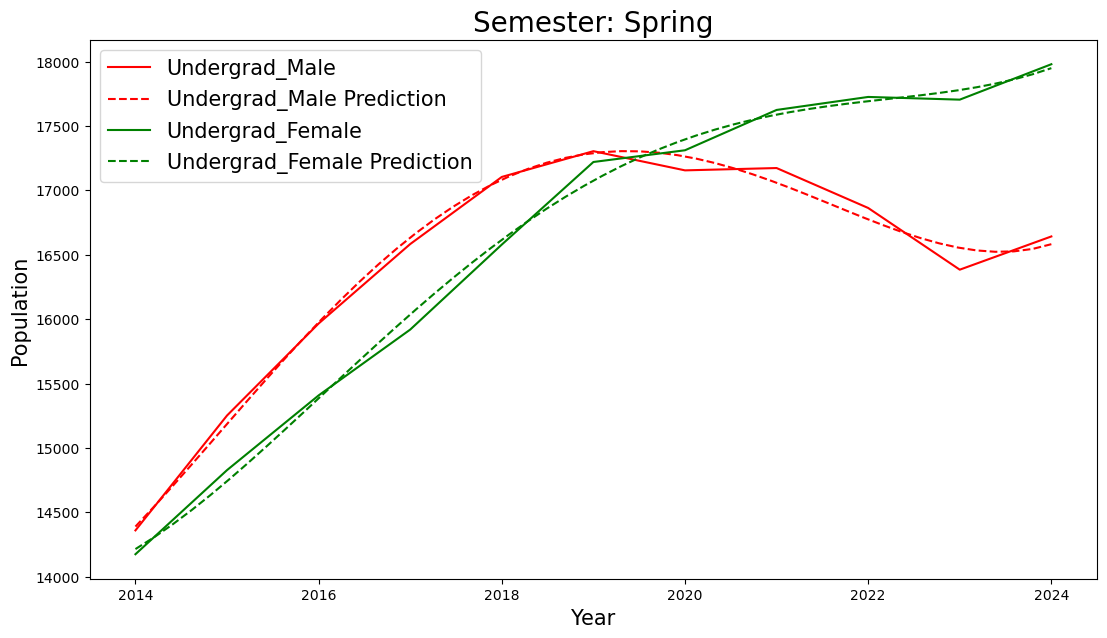

{'Undergrad_Male': array([17092.02734375, 18358.92578125, 20702.38671875]),
 'Undergrad_Female': array([18331.59375   , 19088.015625  , 20407.68359375])}

In [9]:
# Undergraduate Group
student_prediction('Spring', 4, ['Undergrad_Male', 'Undergrad_Female'])

## Prediction - Fall semester (2025 - 2027)

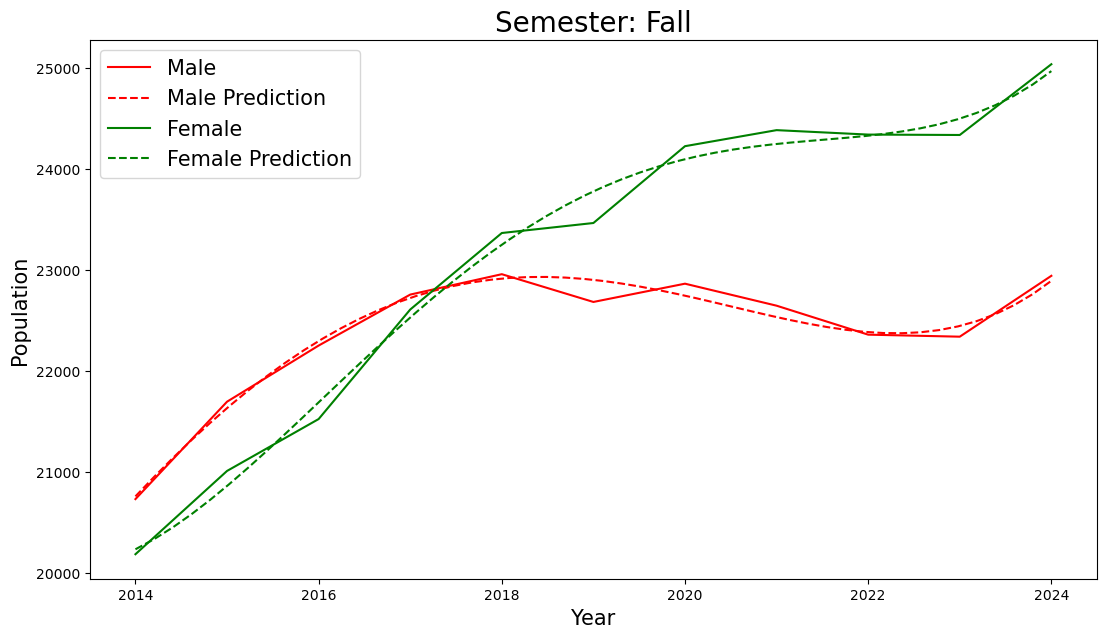

{'Male': array([23931.11328125, 25795.5078125 , 28748.83984375]),
 'Female': array([26013.609375 , 27960.0546875, 31195.875    ])}

In [10]:
# Gender
student_prediction('Fall', 4, ['Male', 'Female'])

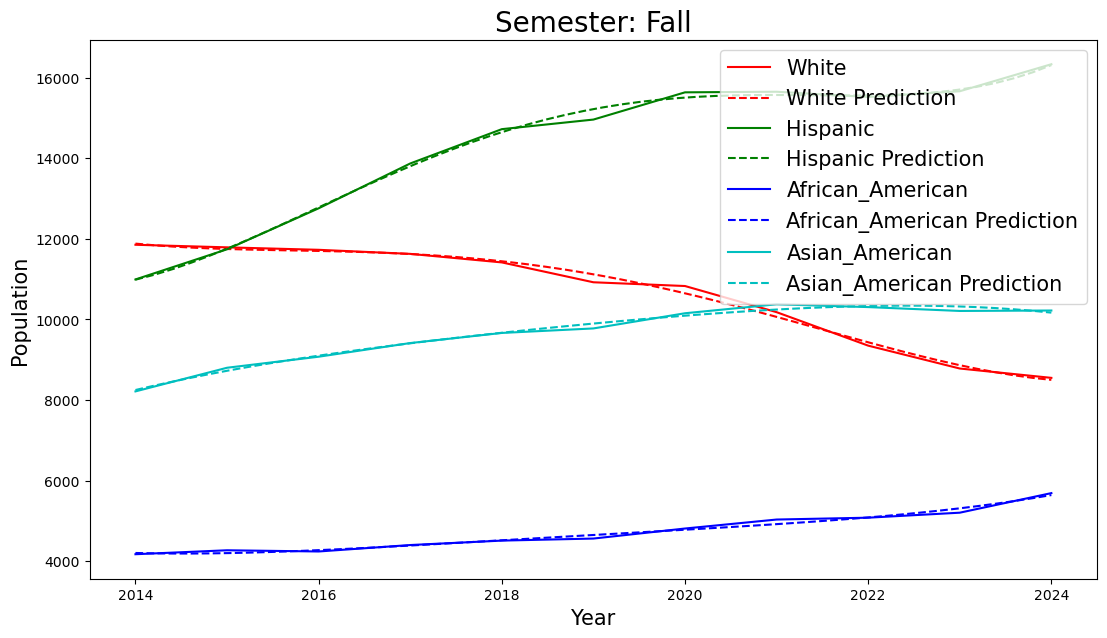

{'White': array([ 8521.4609375 ,  9141.51171875, 10614.265625  ]),
 'Hispanic': array([17771.25     , 20547.625    , 25194.0703125]),
 'African_American': array([6127.5       , 6836.01269531, 7844.27246094]),
 'Asian_American': array([9819.50292969, 9204.52539062, 8247.65917969])}

In [11]:
# Race
student_prediction('Fall', 4, ['White', 'Hispanic', 'African_American', 'Asian_American'])

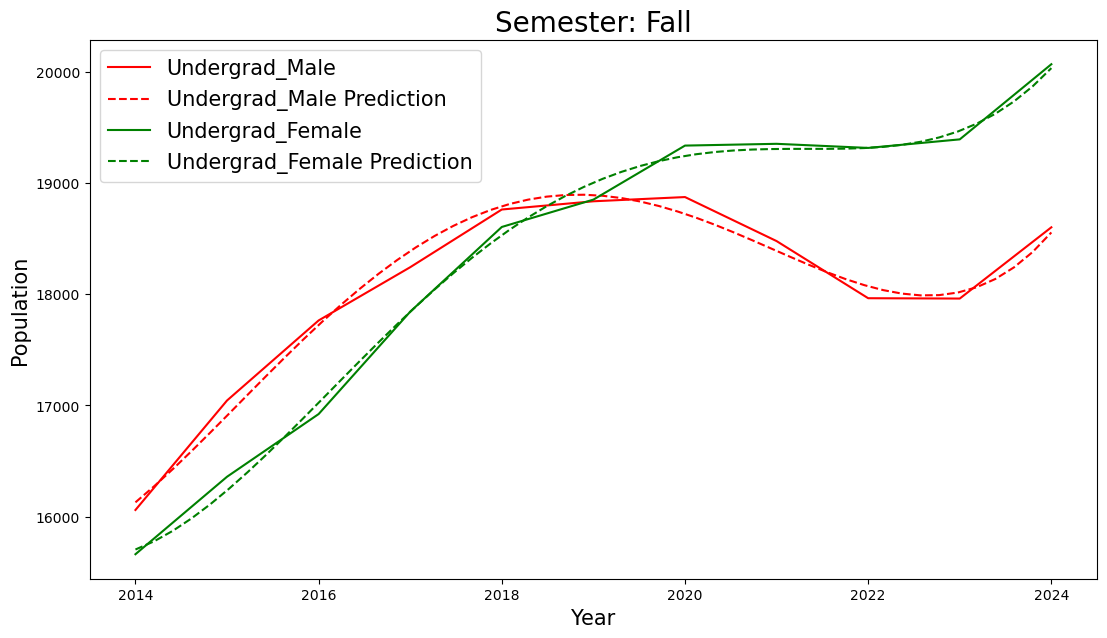

{'Undergrad_Male': array([20079.8828125, 23058.8515625, 28035.8203125]),
 'Undergrad_Female': array([21346.75     , 23814.984375 , 27918.8671875])}

In [12]:
# Undergraduate group
student_prediction('Fall', 4, ['Undergrad_Male', 'Undergrad_Female'])

## International student data

In [13]:
international = pd.read_csv('Data/international_students.csv')
international['Term'] = [semester_split[i][0] for i in range(len(international))]
international['Year'] = [semester_split[i][1] for i in range(len(international))]

international.head()

,Semester,China,India,Vietnam,Nigeria,Saudi_Arabia,South_Korea,Iran,Mexico,Venezuela,...,Taiwan,Turkey,Peru,Pakistan,Nepal,Ukraine,Bangladesh,Sri_Lanka,Term,Year
0,Spring 2014,897,791,340,131,100.0,114.0,101.0,102.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,2014
1,Summer 2014,469,290,78,46,49.0,56.0,74.0,NaN,NaN,...,46.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2014
2,Fall 2014,934,917,320,149,138.0,131.0,124.0,101.0,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,2014
3,Spring 2015,837,917,306,154,141.0,119.0,140.0,94.0,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,2015
4,Summer 2015,187,191,49,49,91.0,21.0,NaN,29.0,24.0,...,NaN,NaN,24.0,24.0,NaN,NaN,NaN,NaN,Summer,2015


In [14]:
# Dropping NA column
international = international.dropna(axis=1)
international.head()

,Semester,China,India,Vietnam,Nigeria,Term,Year
0,Spring 2014,897,791,340,131,Spring,2014
1,Summer 2014,469,290,78,46,Summer,2014
2,Fall 2014,934,917,320,149,Fall,2014
3,Spring 2015,837,917,306,154,Spring,2015
4,Summer 2015,187,191,49,49,Summer,2015


In [15]:
international.Year = international.Year.astype(float)
international.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Semester  33 non-null     object 
 1   China     33 non-null     int64  
 2   India     33 non-null     int64  
 3   Vietnam   33 non-null     int64  
 4   Nigeria   33 non-null     int64  
 5   Term      33 non-null     object 
 6   Year      33 non-null     float64
dtypes: float64(1), int64(4), object(2)
memory usage: 1.9+ KB


In [16]:
international_spring = international[international['Term'] == 'Spring'].copy()
international_summer = international[international['Term'] == 'Summer'].copy()
international_fall = international[international['Term'] == 'Fall'].copy()

In [17]:
def international_prediction(semester: str, deg: int, col: list):
    if semester == 'Spring':
        df = international_spring
    elif semester == 'Summer':
        df = international_summer
    elif semester == 'Fall':
        df = international_fall
    else:
        print('Invalid semester')

    prediction = {}
    plt.figure(figsize=(15, 10))
    for c in col:
        idx = col.index(c)
        p = np.poly1d(np.polyfit(df.Year, df[c], deg))
        x_new = np.linspace(2014, 2024)
        y_new = p(x_new) 
        prediction[c] = p([2025, 2026, 2027])
        plt.plot(df.Year, df[c], color = colors[idx], label = c)
        plt.plot(x_new, y_new, linestyle = '--', color = colors[idx], label = c + ' Prediction')
    n = semester + '_Country_prediction' 
    filename = f"Figure/{n}.jpg"
    plt.savefig(filename, bbox_inches='tight')
    plt.xlabel('Year', fontsize=15)
    plt.ylabel('Population', fontsize=15)
    plt.title('Semester: ' + semester, fontsize=20)
    plt.legend(fontsize = 15)
    plt.savefig(filename, bbox_inches='tight')
    plt.show()  
    
    return prediction

## Prediction - Spring semester (2025 - 2027)

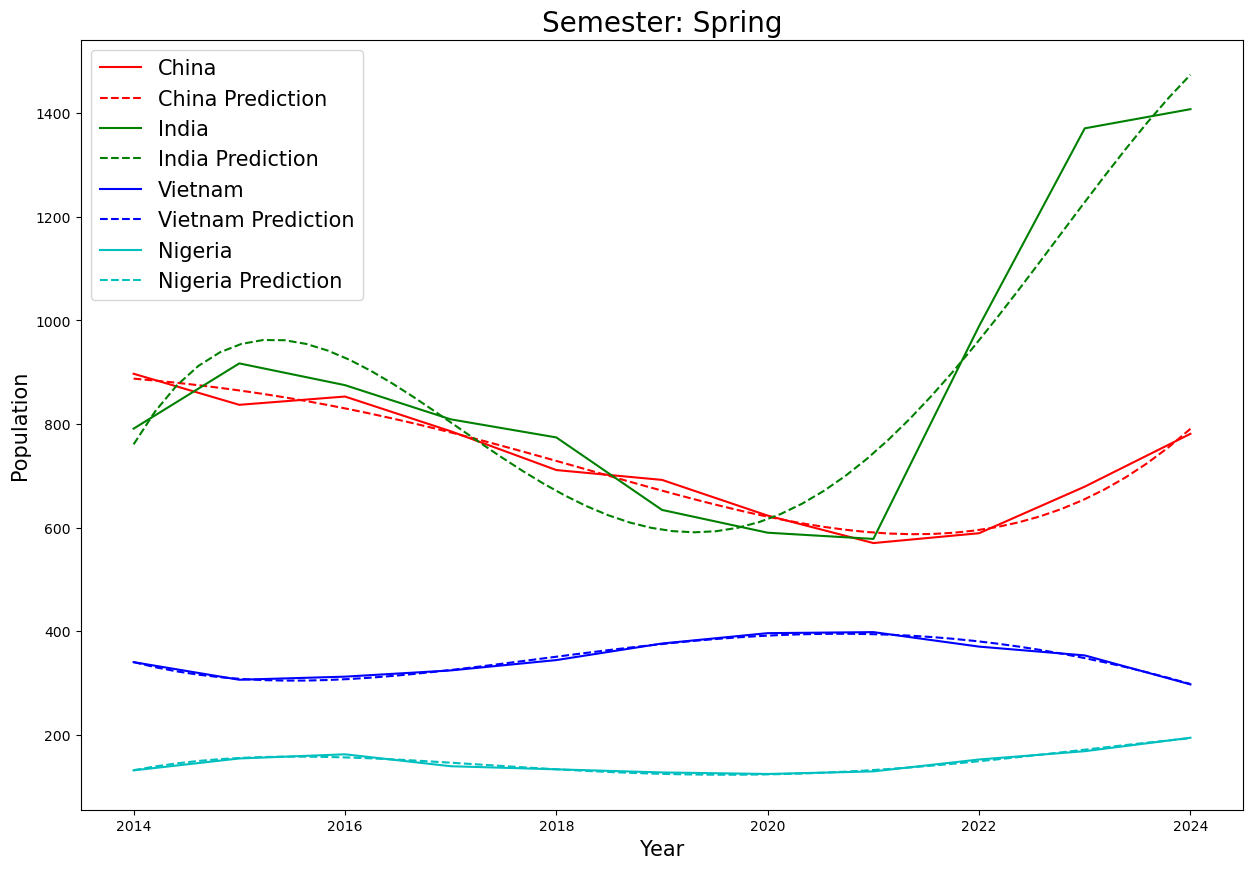

{'China': array([1028.48120117, 1396.56152344, 1926.49365234]),
 'India': array([1603.3125   , 1491.7109375,  989.625    ]),
 'Vietnam': array([232.3605957 , 155.74584961,  74.05932617]),
 'Nigeria': array([206.72998047, 201.64794922, 164.91577148])}

In [18]:
international_prediction('Spring', 4, ['China', 'India', 'Vietnam', 'Nigeria'])

## Prediction - Fall semester (2025 - 2027)

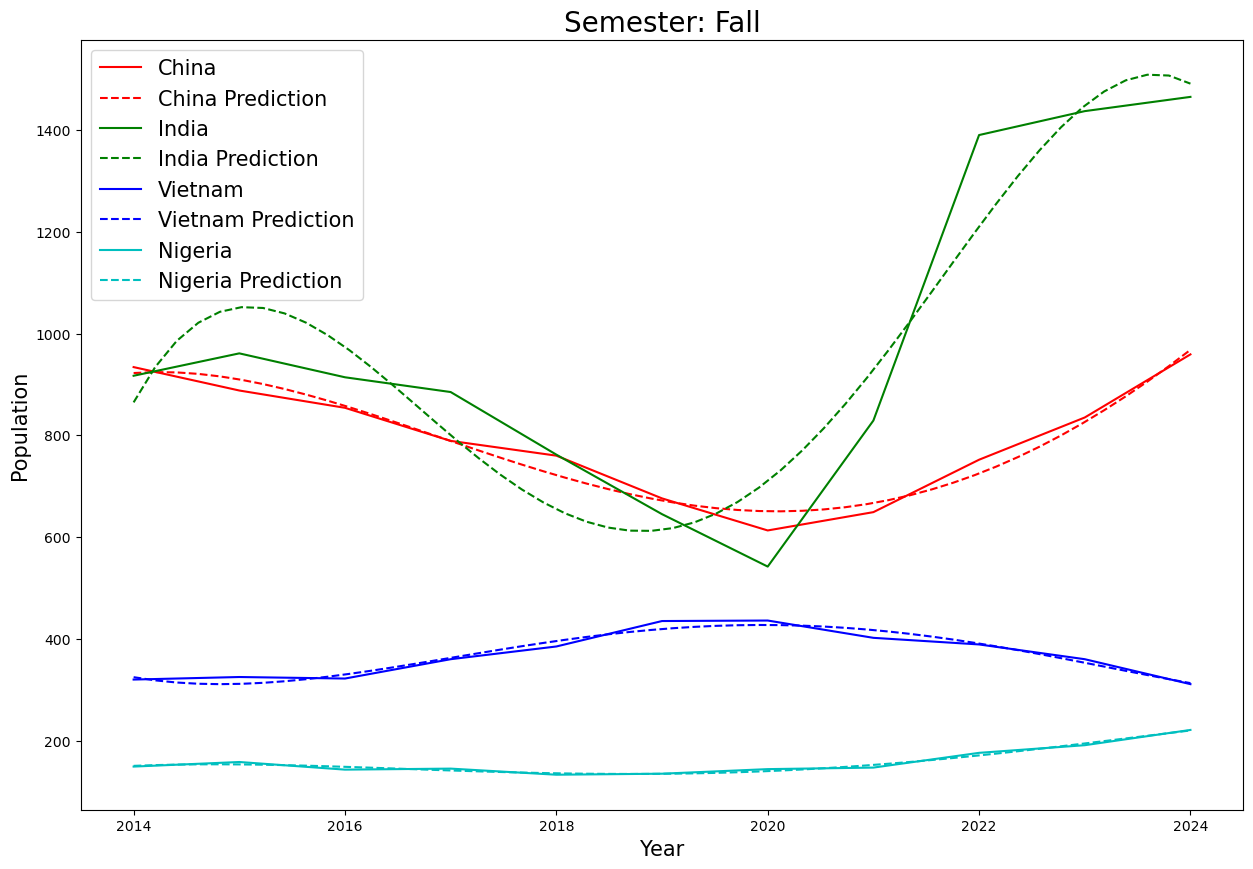

{'China': array([1144.52392578, 1346.45214844, 1560.72900391]),
 'India': array([ 1142.11328125,   158.09375   , -1749.94921875]),
 'Vietnam': array([283.60009766, 281.36865234, 326.71826172]),
 'Nigeria': array([243.72912598, 260.61218262, 264.4954834 ])}

In [19]:
international_prediction('Fall', 4, ['China', 'India', 'Vietnam', 'Nigeria'])